# Robot Programming with Lisp - 2. Imperative Programming

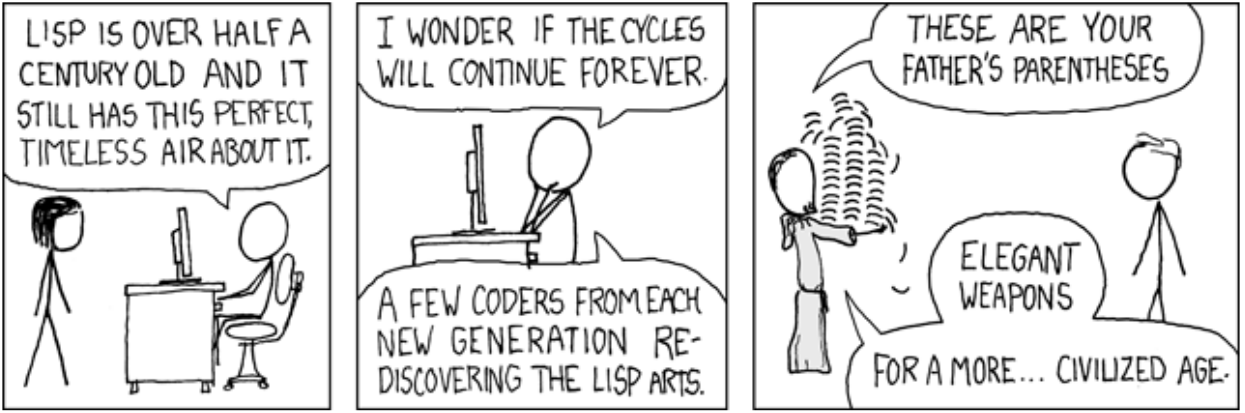

LISP ↔ LISt Processing language

(LISP ↔ Lots of Irritating Superfluous Parenthesis)

## Technical Characteristics

* *Dynamic typing*: specifying the type of a variable is optional
* *Garbage collection*: first language to have an automated GC
* *Functions* as *first-class citizens* (e.g. callbacks)
* *Anonymous* functions
* *Side-effects* are allowed, not purely functional as, e.g., Haskell
* *Run-time code generation*
* *Easily-expandable* through the powerful macros mechanism

## Short History

* 1958: Lisp as a theoretical language designed by John McCarthy (MIT)
* 1958: First Lisp interpreter implementation by Steve Russel (MIT)
* 1962: First Lisp compiler by Tim Hart and Mike Levin (MIT)
* End of 1960s: MacLisp (MIT), Interlisp (Xerox, Stanford, DARPA)
* 1975: Scheme (MIT)
* 1976: Emacs and EmacsLisp by Richard Stallman and Guy Steele
* 1970s - 2000s: Franz Lisp (UC Berkeley), NIL (MIT, Yale), AutoLISP (AutoCAD), Le Lisp (INRIA), PSL (Utah), CMUCL (CMU), T (Yale), Racket, SKILL, LFE (Lisp Flavoured Erlang), ISLISP (ISO standard), ...
* 1984: Common Lisp by Guy Steele, 1999: SBCL
* 1990: Haskell, 1998 the first standard
* 1994: ANSI Common Lisp
* 2007: Clojure

## Hello World

In [ ]:
"Hello World!"

## Polish Notation
a.k.a. **prefix notation** as S-expressions (S for symbolic)

In [ ]:
;; Examples
(+ 1 2 3 4)

In [ ]:
(sin 3.14)

In [ ]:
(/ (+ 4 2) 3)

In [ ]:
(list 1 2 3)

In [ ]:
(defun return-my-arg (arg)
    arg)

In [ ]:
(return-my-arg 302)

## Numbers

In [ ]:
;; Integer
(describe 1)

In [ ]:
;; Float
(describe 1.0)

In [ ]:
(describe 1f0)

In [ ]:
1f3

In [ ]:
;; Double
(describe 1d0)

In [ ]:
;; Ratio
(/ 1 3)

In [ ]:
(describe 1/3)

In [ ]:
(describe (/ 1.0 3))

In [ ]:
;; Numeral systems
#xFF

In [ ]:
#b1111

## Chars and Strings

In [ ]:
;; Char
(describe #\Z)

In [ ]:
(describe #\Ö)

In [ ]:
;; String
(describe "hello")

## Variables and Symbols

In [ ]:
;; Variable
x

In [ ]:
;; Symbol
(describe 'x)

In [ ]:
(describe :x)

In [ ]:
(describe ':x)

## Booleans

In [ ]:
;; False
(describe NIL)

In [ ]:
;; True
(describe T)

## Lists

In [ ]:
;; List
(list 1 2 3)

In [ ]:
*

In [ ]:
(describe *)

In [ ]:
'(1 2 3)

In [ ]:
'((1.1 1.2) (2.1 2.2) (some more stuff) (+ 1 3))

## Lists explained
It’s a linked list where each element has only 2 slots: *value* and *next-elem*. *next-elem* of the last element is **NIL**.

The elements are called *cons cells* or *cons pairs*.

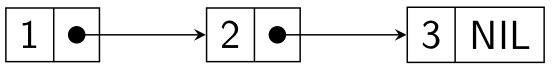

In [ ]:
;; List and NIL
'()

In [ ]:
(list )

In [ ]:
(type-of '(1 1 1))

In [ ]:
(listp '(1 1 1))

In [ ]:
(listp '())

## Association Lists
It’s a list where the first element of each cons cell is itself a cons cell.

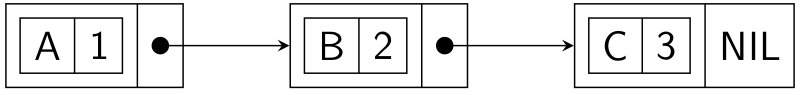

In [ ]:
;; AList
'((A . 1) (B . 2) (C . 3))

In [ ]:
(describe *)

## Arrays

In [ ]:
;; Vector
#(1 2 3)

In [ ]:
;; Matrix
#2A((1 2) (3 4))

In [ ]:
;; Multi-dimensional array
(make-array '(4 2 3)
            :initial-contents
            '(((a b c) (1 2 3))
              ((d e f) (3 1 2))
              ((g h i) (2 3 1))
              ((j k l) (0 0 0))))

## Data Types

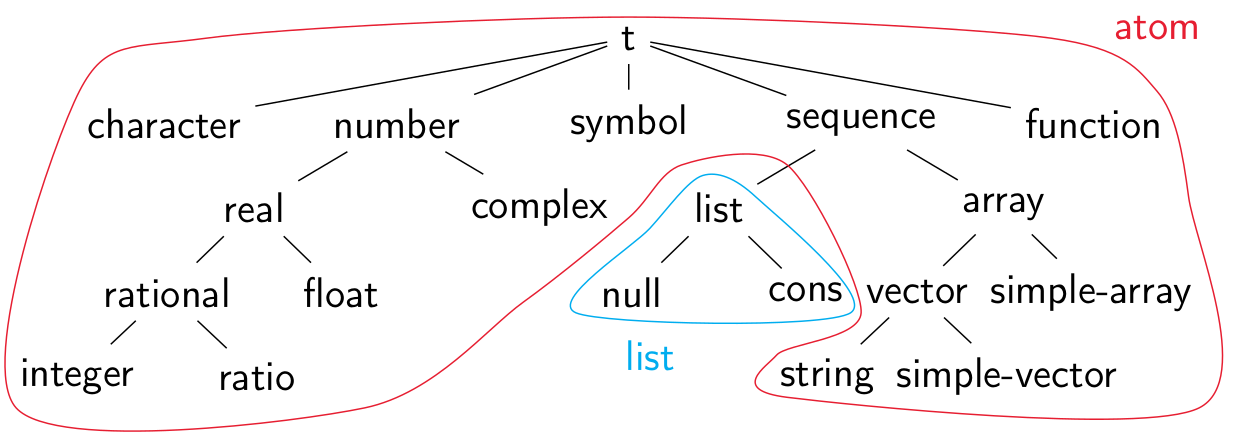

The diagram is very simplified.
Also, the following is completely omitted:
* standard-object (CLOS)
* stream (files)
* condition (error handling), ...

In [ ]:
;; Quoted constructs (both atoms and lists) are data
'"abc"

In [ ]:
'(+ 1 2)

In [ ]:
;; Everything else is code
(+ 1 2)

In [ ]:
;; Conclusion: run-time code generation and manipulation done easily!
(eval '(+ 1 2)) ; but don't EVER use "eval" directly

## Code as Composition of Lists
Code is one big nested list. Depending on the first element, an
S-expression is compiled into a function, special form or macro.

In [ ]:
;; Function
'(list '+ 1 2)

In [ ]:
;; Special Form
(list 'if t 1 2)

In [ ]:
;; Macro
(list 'defun 'return-a '(a) 'a)

In [ ]:
;; Resolve
(eval *)

In [ ]:
(return-a 5)

## More on Symbols

In [ ]:
;; Symbol
(setf my-symbol 1)

In [ ]:
(defun my-symbol () 2)

In [ ]:
(setf (get 'my-symbol 'my-property) 3)

In [ ]:
'my-symbol

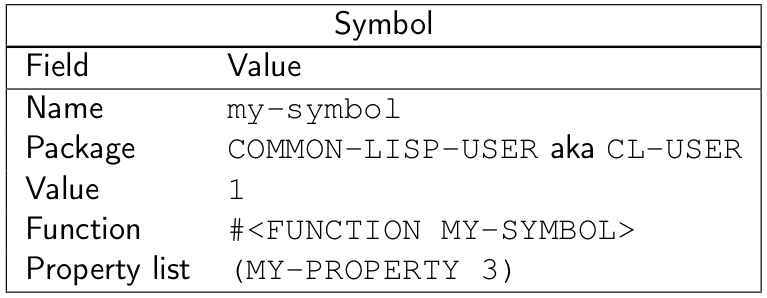

## Read-Eval-Print Loop
An example for special form REPLoop evaluation is the if command:
it evaluates only the first parameter, then chooses to evaluate either the second or third.

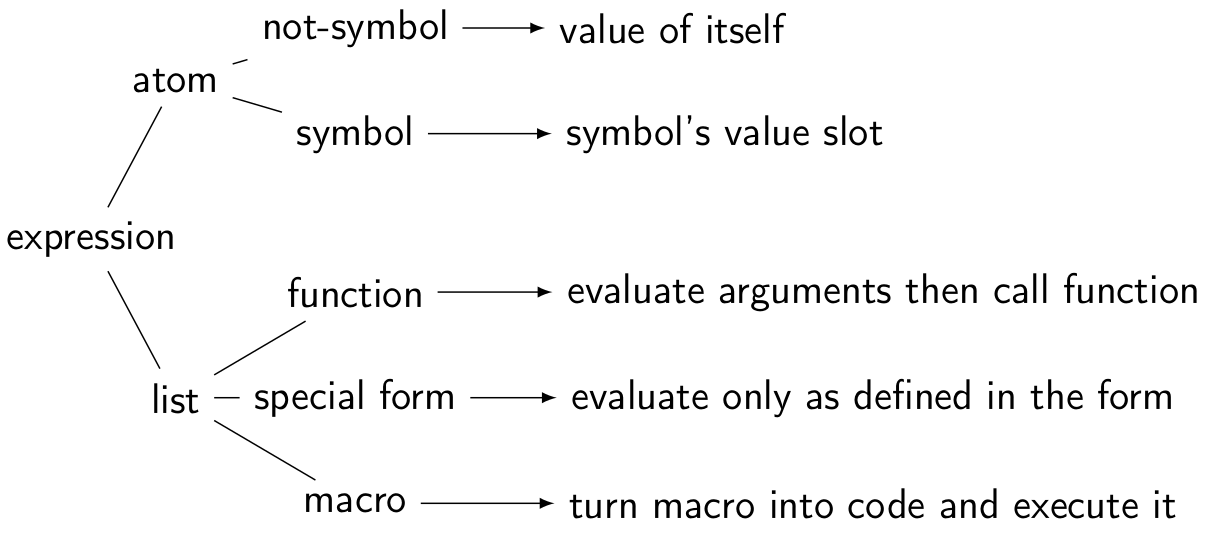

## Imperative Programming

The *imperative programming* paradigm represents programs as **sequences of commands**.

One important property thereof is that the program has a **state** and the
commands manipulate it to achieve a desired state.

Common Lisp has powerful means for imperative programming (e.g., very
advanced looping mechanisms) but many traditionally imperative
constructs are implemented differently in Lisp.

We’ll consider both ways (*imperative* vs. *functional* ) and then compare them.

## Special Variables

In [ ]:
;; Global Variables
(defvar *my-global-var* 'some-value "test variable")

In [ ]:
*my-global-var*

In [ ]:
(setf *my-global-var* 23)

In [ ]:
*my-global-var*

In [ ]:
(incf *my-global-var*)

In [ ]:
(defvar *my-global-var* 25)

In [ ]:
*my-global-var*

In [ ]:
;; Parameters
(defparameter *my-param* 0.01)

In [ ]:
*my-param*

In [ ]:
(setf *my-param* 0.1)

In [ ]:
*my-param*

In [ ]:
(defparameter *another-param*)

In [ ]:
(defparameter *my-param* 0.5)

In [ ]:
*my-param*

In [ ]:
;; Constants -- Naming convention: +the-constant-name+.
(defconstant +my-pi+ 3.14)

In [ ]:
+my-pi+

In [ ]:
(setf +my-pi+ 3.14159)

In [ ]:
(defconstant +my-pi+ 3.14159)

## Local Variables

In [ ]:
;; Defining Local Variables
(let ((a 1)
      (b 2))
     (print a)
     b)

In [ ]:
(print b)

In [ ]:
;; Dependent Local Variables
(let* ((a 1)
       (b (+ a 2)))
      (print a)
      b)

## Type Operations

In [ ]:
;; Predicates
(type-of 5)

In [ ]:
(typep 5 'number)

In [ ]:
(type-of #c(5 1))

In [ ]:
(type-of 'nil)

In [ ]:
(listp '(1 2 3))

In [ ]:
(symbolp 'a)

In [ ]:
(type-of :k)

In [ ]:
(symbolp :k)

In [ ]:
;; Casts
(coerce '(a b c) 'vector)

In [ ]:
(coerce "a" 'character)

In [ ]:
(coerce 7/2 'float)

In [ ]:
(coerce 7/2 'number)

In [ ]:
(coerce 7/2 't)

In [ ]:
(coerce 7/2 'null)

## Comparing

In [ ]:
(> 2 1.5d0)

In [ ]:
(<= 3.0d0 3)

In [ ]:
(eq 1 1)

In [ ]:
(eq 'bla 'bla)

In [ ]:
(eq "bla" "bla")

In [ ]:
(eq '(1 2 3) '(1 2 3))

In [ ]:
(eql '(1 2 3) '(1 2 3)

In [ ]:
(eql 1.0 1)

In [ ]:
(equal '(1 2 3) '(1 2 3))

In [ ]:
(equal "bla" "bla")

In [ ]:
(equal "bla" "Bla")

In [ ]:
(equalp "bla" "Bla")

In [ ]:
(equal #(1 2 3) #(1 2 3))

In [ ]:
(equalp #(1 2 3) #(1 2 3))

In [ ]:
(= 2.4 2.4d0)

In [ ]:
(string= "hello" "hello")

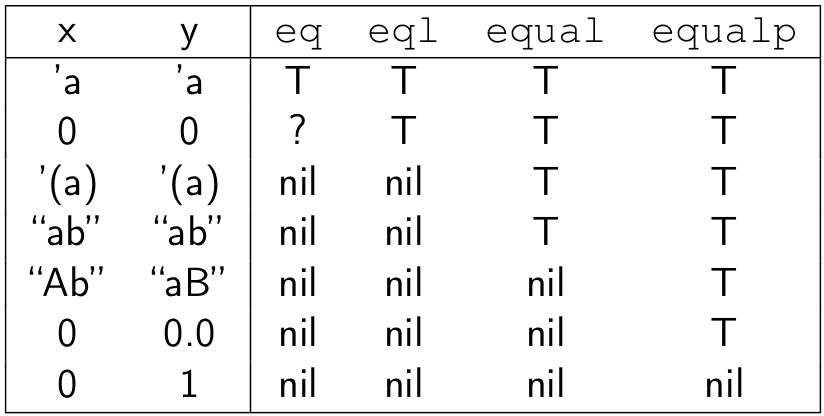

**=** is for comparing numbers of the same type.

**string=** is an advanced tool for comparing strings.

## List Operations

In [ ]:
;; Lists
(cons 1 (cons 2 (cons 3 nil)))

In [ ]:
(list 1 2 3)

In [ ]:
'(1 2 3)

In [ ]:
(listp *)

In [ ]:
(null **)

In [ ]:
(null '())

In [ ]:
(null '(()))

In [ ]:
(member 2 '(1 2 3))

In [ ]:
(member 2 '((1 2) (3 4)))

In [ ]:
(defvar *my-list* '(1 2 3 4 5))

In [ ]:
(first *my-list*)

In [ ]:
(rest *my-list*)

In [ ]:
(nth 4 *my-list*)

In [ ]:
(fourth *my-list*)

In [ ]:
(last *my-list*)

In [ ]:
(push 0 *my-list*)

## AList Operations

In [ ]:
;; Association Lists
(cons (cons "Alice" "Jones")
      (cons (cons "Bill" "Smith")
            (cons (cons "Cathy" "Smith")
                  nil)))

In [ ]:
'(("Alice" . "Jones") ("Bill" . "Smith") ("Cathy" . "Smith"))

In [ ]:
(assoc "Alice" *)

In [ ]:
(assoc "Alice" ** :test \#'string=)

In [ ]:
(rassoc "Smith" *** :test \#'string=)

## Property Lists and Vectors

In [ ]:
;; Property Lists
(defvar *plist* '())

In [ ]:
(setf (getf *plist* 'key) 'value)

In [ ]:
(setf (getf *plist* 'another-key)
      'another-value)

In [ ]:
*plist*

In [ ]:
(setf (getf *plist* 'another-key)
      'another-value)

In [ ]:
*plist*

In [ ]:
(setf (getf *plist* 'key)
      'new-value)

In [ ]:
*plist*

In [ ]:
;; Vectors
#2A((1 2) (3 4))

In [ ]:
(aref * 0 0)

In [ ]:
(aref ** 1 1)

In [ ]:
#(1 2 3 4 5 6)

In [ ]:
(setf (aref * 5) 9)

In [ ]:
**

## Input/Output

In [ ]:
;; Format Statements, Streams and Files
(read)

In [ ]:
(read-line)

In [ ]:
(format nil "symbol to ~a" 'string)

In [ ]:
(format t "1 + 1 = ~a~%" (+ 1 1))

In [ ]:
(with-open-file (stream "~/.bashrc")
    (do ((line (read-line stream nil)
               (read-line stream nil)))
        ((null line))
        (print line)))

## Program Flow Constructs

In [ ]:
;; if, case, unless
(defvar *weather* 'rainy)

In [ ]:
(if (eql *weather* 'rainy)
    (format t "I'm staying at home.")
    (format t "Let's go for a walk!"))

In [ ]:
(case *weather*
    (rainy "Stay home")
    (snowing "Go ski")
    (sunny "Got to the park")
    (otherwise "Hmmm..."))

In [ ]:
(setf *weather* 'very-nice)

In [ ]:
(unless (eql *weather* 'rainy)
    (format t "Let's go for a walk!"))

In [ ]:
;; when, progn
(setf *weather* 'rainy)

In [ ]:
(if (eql *weather* 'rainy)
    (progn
        (format t "Let's go for a walk.~%")
        (format t "But don't forget your umbrella.~%")))

In [ ]:
(when (eql *weather* 'rainy)
    (format t "Let's go for a walk.~%")
    (format t "But don't forget your umbrella.~%"))

In [ ]:
;; prog1, cond
(progn (setf *weather* 'it-rains-cats)
    (format t "The weather today is ~a~%" *weather*))

In [ ]:
(prog1 (setf *weather* 'whatever)
    (format t "The weather today is ~a~%" *weather*))

In [ ]:
(defvar *x* 1.5)

In [ ]:
(cond ((< *x* 0) -*x*)
    ((< *x* 1) 1)
    (t *x*))

## Logical Operators

In [ ]:
;; and, or, not
(defparameter *threshold* 0.001)

In [ ]:
(if (not (and (<= *threshold* 1) (> *threshold* 0)))
    (error "*threshold* should lie within (0; 1]~%"))

In [ ]:
(if (or (> *threshold* 1) (<= *threshold* 0))
    (error "*threshold* should lie within (0; 1]~%"))

In [ ]:
(unless (and (<= *threshold* 1) (> *threshold* 0))
    (error "*threshold* should lie within (0; 1]~%"))

## Looping

In [ ]:
;; dotimes, dolist, loop
(dotimes (i 10 (format t "the end~%"))
(format t "~d " i))

In [ ]:
(defparameter *random* (loop repeat 10 collect (random 10000)))

In [ ]:
(dolist (element *random* (format t "...~%"))
    (format t "~a " element))

In [ ]:
(loop for i in *random*
      counting (evenp i) into evens
      counting (oddp i) into odds
      summing i into total
      maximizing i into max
      minimizing i into min
      finally (return (list evens odds total max min)))

## Defining a Function and Calling It

In [ ]:
;; Defining a Function
(defun my-cool-function-name (arg-1 arg-2 arg-3 arg-4)
    "This function combines its 4 input arguments into a list
    and returns it."
    (list arg-1 arg-2 arg-3 arg-4))

In [ ]:
;; Calling a Function
(my-cool-function-name 1 3 5 7)

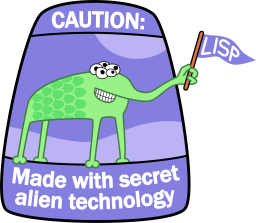

## Assignment Goals

Due: Wednesday, 02.11. 23:59 CEST

Points: 7

### Task 1: Update your repository
* Go to your *lisp_course_material* directory and update it:
  * `git pull origin main`
* You will see new directories that appeared under *lecture/robot_programming_with_lisp*
  * the two new directories are *2_simple_world* and *bullet_wrapper*

### Task 2: Solve the assignment code
* Your Lisp assignment is in *2_simple_world/assignment.ipynb*

## Next Class

Thursday, 03.11. 14:15 CEST, same place, TAB 0.30 (entrance E)

## Links
* Revenge of the nerds: http://www.paulgraham.com/icad.html
* Practical Common Lisp online book: http://www.gigamonkeys.com/book/